In this notebook, I will investigate the degree of missingness. First on the X, and then the autosomes.
Then, I will look at various other measures to identify whether other sites should be removed, such as HW-filtering.

In [2]:
%run ../scripts/notebook_settings.py

In [58]:
zarr_dir = "/faststorage/project/baboondiversity/data/PG_panu3_zarr_01_03_2021/callset.zarr/chrX"
meta_data_samples = pd.read_table("../data/metadata_with_x_missing.txt", sep=" ")
#Opening the zarr data
callset = zarr.open_group(zarr_dir, mode="r")

Creating the gt dataframe

In [59]:
gt = allel.GenotypeArray(callset["calldata/GT"])
n_s = len(callset["samples"]) #number of samples

Calculating and plotting missingness

In [6]:
missingness = gt.is_missing()

In [7]:
m_per_s = missingness.sum(axis=1)

In [8]:
d = {"m": m_per_s, "pos": vcf_callset["variants/POS"]}
m_df = pd.DataFrame(data=d)

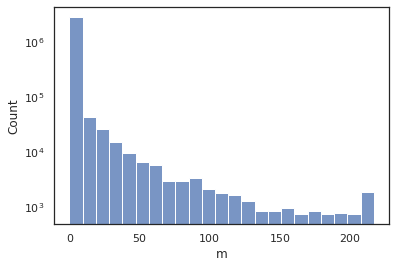

In [9]:
g = sns.histplot(m_df, x="m")
g.set_yscale("log")

In [10]:
len(m_df.loc[m_df.m == n_s]) #99 sites with no calls, comes from the captive/old individuals
len(m_df.loc[m_df.m == 0]) #2572788 sites with no missing
len(m_df.loc[m_df.m == 0])/len(m_df) #0.880 of sites has no missing
len(m_df.loc[m_df.m <= n_s*0.1])/len(m_df) #0.973 of sites has less than 10 % missing
len(m_df.loc[m_df.m <= n_s*0.2])/len(m_df) #0.986 of sites has less than 20 % missing

0.9864005758049706

Same analysis, now on chr7

In [4]:
zarr_dir = "/faststorage/project/baboondiversity/data/PG_panu3_zarr_01_03_2021/callset.zarr/chr7"
meta_data_samples = pd.read_table("../data/metadata_with_x_missing.txt", sep=" ")
#Opening the zarr data
callset = zarr.open_group(zarr_dir, mode='r')
gt = allel.GenotypeArray(callset["calldata/GT"])
n_s = len(callset["samples"]) #number of samples
missingness = gt.is_missing()
m_per_s = missingness.sum(axis=1)
d = {"m": m_per_s, "pos": callset["variants/POS"]}
m_chr7_df = pd.DataFrame(data=d)

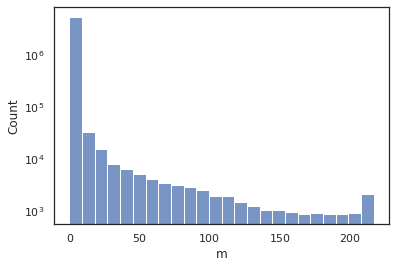

In [5]:
g = sns.histplot(m_chr7_df, x="m")
g.set_yscale("log")

Repeating X analysis based on zarr, and with the newer metadata generated in dp01

In [6]:
zarr_dir = "/faststorage/project/baboondiversity/data/PG_panu3_zarr_01_03_2021/callset.zarr/chrX"
meta_data_samples = pd.read_table("../data/metadata_with_x_missing.txt", sep=" ")
#Opening the zarr data
callset = zarr.open_group(zarr_dir, mode='r')
gt = allel.GenotypeArray(callset["calldata/GT"])

In [7]:
n_s = len(callset["samples"]) #number of samples
missingness = gt.is_missing()
m_per_s = missingness.sum(axis=1)
d = {"m": m_per_s, "pos": callset["variants/POS"]}
m_zarr_df = pd.DataFrame(data=d)

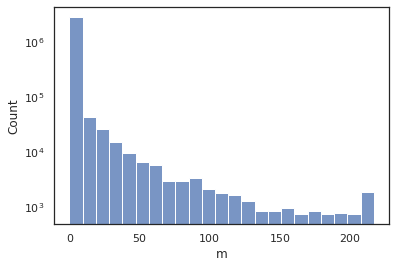

In [8]:
g = sns.histplot(m_zarr_df, x="m")
g.set_yscale("log")

In [9]:
len(m_zarr_df.loc[m_zarr_df.m <= n_s*0.1])/len(m_zarr_df) #0.973 again
len(m_zarr_df.loc[m_zarr_df.m <= n_s*0.05])/len(m_zarr_df) #0.958

0.9580468334147506

Now only with females and less than 1 % missing
I notice now that I misread dp02 by a factor of 10 - the highest degree of missingness is 1,6 %, not 16 %

In [10]:
females = meta_data_samples.loc[(meta_data_samples.Sex == "F")]
max(females["x_missing"]), len(females)

(0.016083677817414543, 95)

In [11]:
females

,PGDP_ID,Provider_ID,Provider,Genus,Species,Origin,Sex,callset_index,C_origin,x_missing
0,PD_0199,09SNF1101115,Knauf/Chuma/Roos,Papio,anubis,"Serengeti, Tanzania",F,1,"Serengeti, Tanzania",0.003591
1,PD_0200,11SNF1101115,Knauf/Chuma/Roos,Papio,anubis,"Serengeti, Tanzania",F,2,"Serengeti, Tanzania",0.004100
3,PD_0202,20SNF1131115,Knauf/Chuma/Roos,Papio,anubis,"Serengeti, Tanzania",F,4,"Serengeti, Tanzania",0.010041
4,PD_0203,21SNF1151115,Knauf/Chuma/Roos,Papio,anubis,"Serengeti, Tanzania",F,5,"Serengeti, Tanzania",0.003674
6,PD_0205,05ANF1030116,Knauf/Chuma/Roos,Papio,anubis,"Arusha, Tanzania",F,7,Northern Tanzania,0.004107
...,...,...,...,...,...,...,...,...,...,...
210,PD_0788,34413_BZ11060,Rogers/Jolly/Phillips-Conroy,Papio,kindae,"Chunga, Zambia",F,211,"Chunga, Zambia",0.010075
211,PD_0789,34417_BZ11064,Rogers/Jolly/Phillips-Conroy,Papio,kindae,"Chunga, Zambia",F,212,"Chunga, Zambia",0.010196
212,PD_0790,34418_BZ11065,Rogers/Jolly/Phillips-Conroy,Papio,kindae,"Chunga, Zambia",F,213,"Chunga, Zambia",0.009835
213,PD_0791,34419_BZ11066,Rogers/Jolly/Phillips-Conroy,Papio,kindae,"Chunga, Zambia",F,214,"Chunga, Zambia",0.009672


In [12]:
IDs = (meta_data_samples.loc[(meta_data_samples.x_missing <= 0.01)
                             & (meta_data_samples.Sex == "F")]).callset_index.values
len(IDs)

89

In [13]:
gt_females = gt.take(IDs, axis=1)

In [14]:
n_s = len(IDs) #number of samples
missingness = gt_females.is_missing()
m_per_s = missingness.sum(axis=1)
d = {"m": m_per_s, "pos": callset["variants/POS"]}
m_zarr_f_df = pd.DataFrame(data=d)

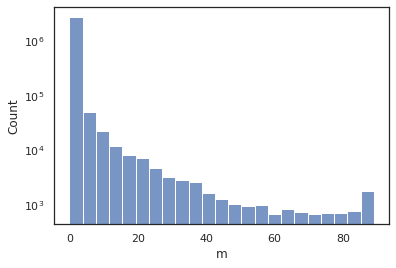

In [15]:
g = sns.histplot(m_zarr_f_df, x="m")
g.set_yscale("log")

In [16]:
len(m_zarr_f_df.loc[m_zarr_f_df.m <= n_s*0.1])/len(m_zarr_df),len(m_zarr_f_df.loc[m_zarr_f_df.m <= n_s*0.05])/len(m_zarr_df) #0.96

(0.9767392854161792, 0.9622784799733991)

Picking out the sites to keep:

In [17]:
len(m_per_s <= n_s*0.05) #2923212, all sites as it is a boolean

2923212

In [18]:
len(np.nonzero(m_per_s <= n_s*0.05)[0]) #2812944 sites

2812944

In [19]:
len(np.nonzero(m_per_s <= n_s*0.05)[0])/len(m_per_s <= n_s*0.05)

0.9622784799733991

To avoid saving too many intermediate files, I am also going to do the rest of the site filtering in this notebook.
First, looking into the inbreeding coefficient.

In [20]:
gt_missing_filter = gt_females.take(np.nonzero(m_per_s <= n_s*0.05)[0])
gt_missing_filter

<GenotypeArray shape=(2812944, 89, 2) dtype=int8>
1/1 0/0 0/1 1/1 0/1 ... 0/0 0/0 0/0 0/0 0/1
0/0 0/1 0/0 0/0 0/0 ... 0/1 0/1 0/1 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/1 0/1 1/1 0/1 1/1 ... 1/1 1/1 1/1 1/1 ./.

In [21]:
obs_het = allel.heterozygosity_observed(gt_females)

Quick simulation to check the expected distribution of coefficients given true allele freq of 0.5:

In [22]:
sim_het = np.random.binomial(n_s, 0.5, 10000000)/n_s #n_s is the number of samples
sim_inbreed = 1-sim_het/0.5

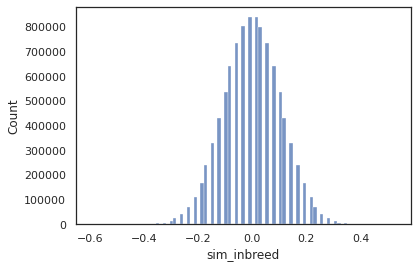

In [36]:
d = {"sim_inbreed": sim_inbreed}
sim = pd.DataFrame(data=d)
g = sns.histplot(sim, x="sim_inbreed", bins=n_s)

In [53]:
sim["sim_inbreed"].quantile(0.005)

-0.2808988764044944

Fill determines what to do when expected heterozygosity = 0, which means that the site is invariant.
I can set the inbreeding to be -2 there, but choose to set it as 0 to not filter those sites. For shared variants, fixed derived has some interests.

In [42]:
inbreeding = allel.inbreeding_coefficient(gt_females, fill=0)

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/allel/stats/hw.py:152: RuntimeWarning: divide by zero encountered in true_divide
  f = np.where(he > 0, 1 - (ho / he), fill)


In [43]:
d = {"inbreeding": inbreeding}
hw_df = pd.DataFrame(data=d)

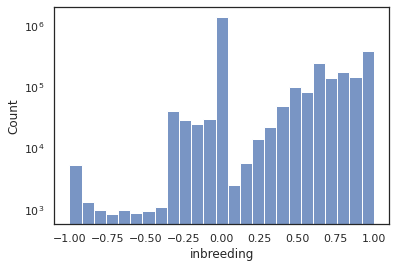

In [44]:
g = sns.histplot(hw_df, x="inbreeding", bins=25)
g.set_yscale("log")

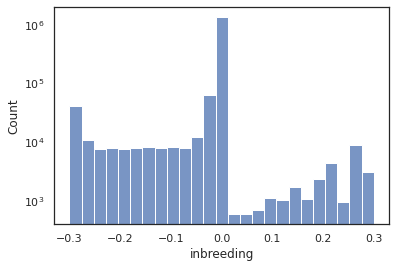

In [52]:
sub_hw = hw_df.loc[(hw_df.inbreeding > -0.3) & (hw_df.inbreeding < 0.3)]
g = sns.histplot(sub_hw, x="inbreeding", bins=25)
g.set_yscale("log")

In [50]:
sum((inbreeding > -0.3) & (inbreeding <= 1))/len(inbreeding)

0.9954536311427293

In [51]:
sum(inbreeding > -0.3)

2909922

In [54]:
kept_i = np.nonzero((m_per_s <= n_s*0.05) & (inbreeding > -0.3))[0]
len(kept_i)/len(inbreeding)

0.9579602847826295

In [62]:
np.save("../data/kept_pos_x_female", kept_i)

As a last check, here is how it looks when investigating inbreeding after having removed missing:

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/allel/stats/hw.py:152: RuntimeWarning: divide by zero encountered in true_divide
  f = np.where(he > 0, 1 - (ho / he), fill)


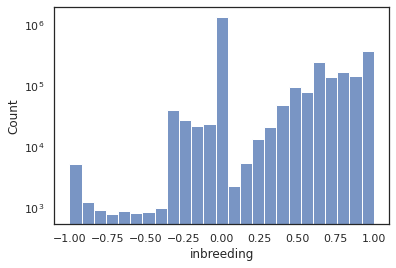

In [56]:
inbreeding = allel.inbreeding_coefficient(gt_missing_filter, fill=0)
d = {"inbreeding": inbreeding}
hw_df = pd.DataFrame(data=d)
g = sns.histplot(hw_df, x="inbreeding", bins=25)
g.set_yscale("log")